In [5]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'

In [6]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy==3.0.4"
    ! pip install -q "matplotlib==3.6.0"
    from gwpy.timeseries import TimeSeries 

In [8]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


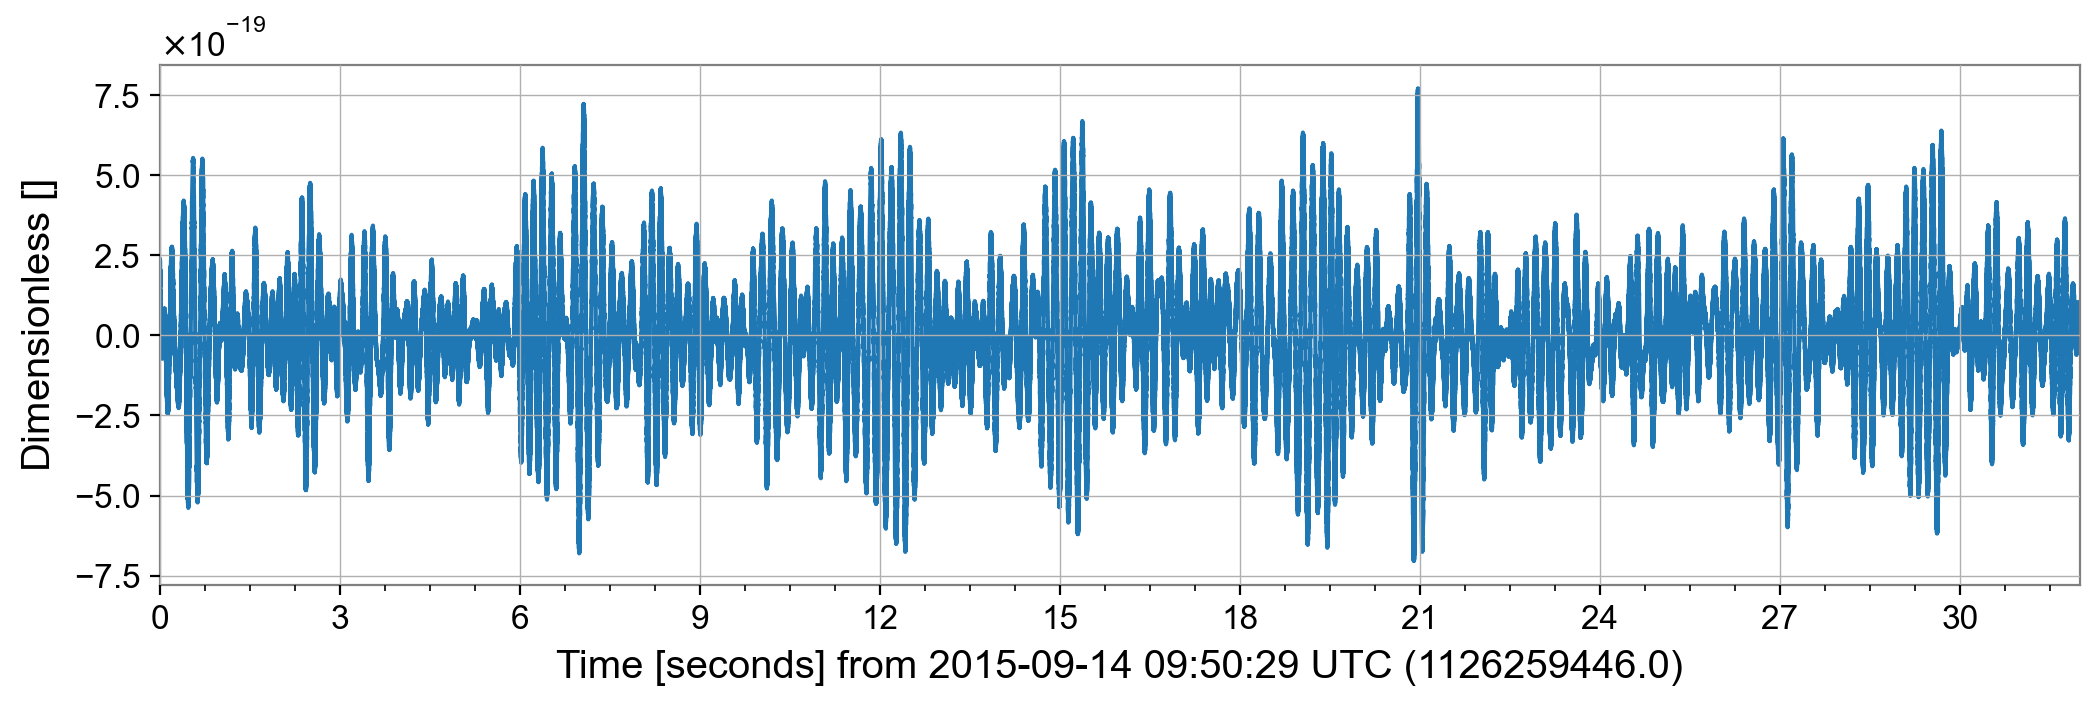

In [9]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

(1e-24, 1e-19)

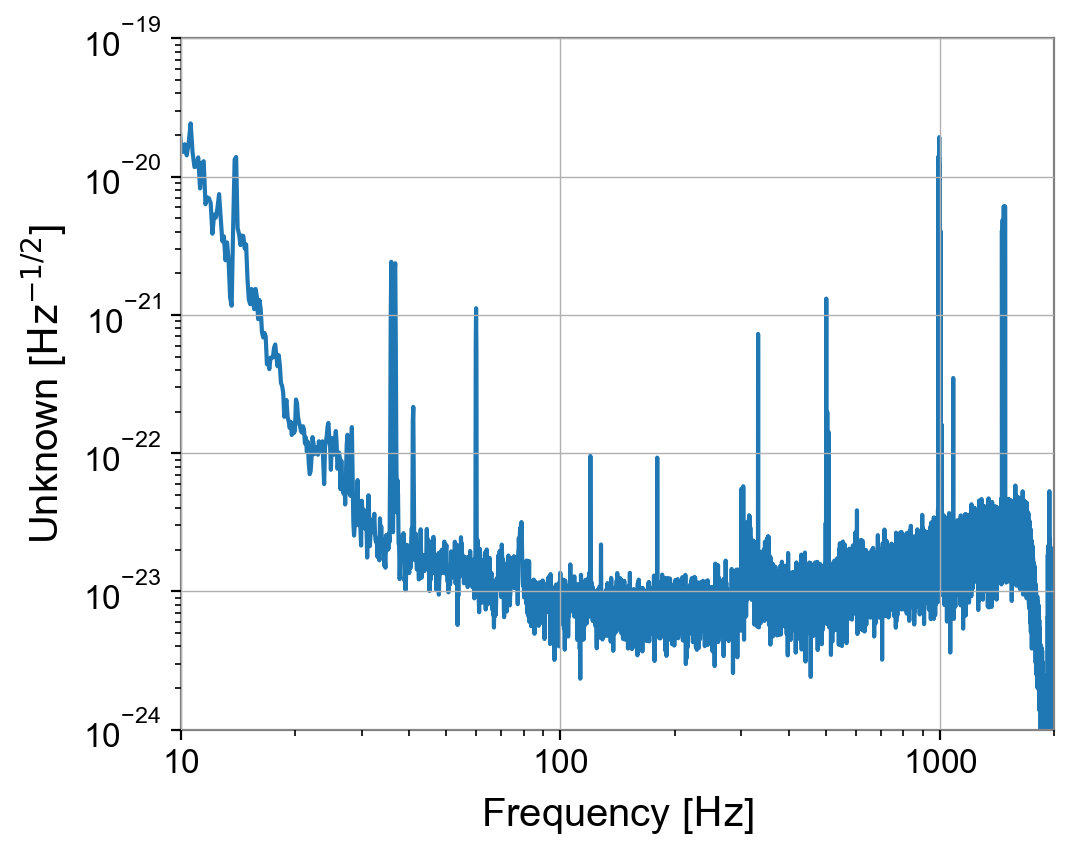

In [10]:
# -- Plot ASD (amplitude spectral density)
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

(1126259462.2, 1126259462.5)

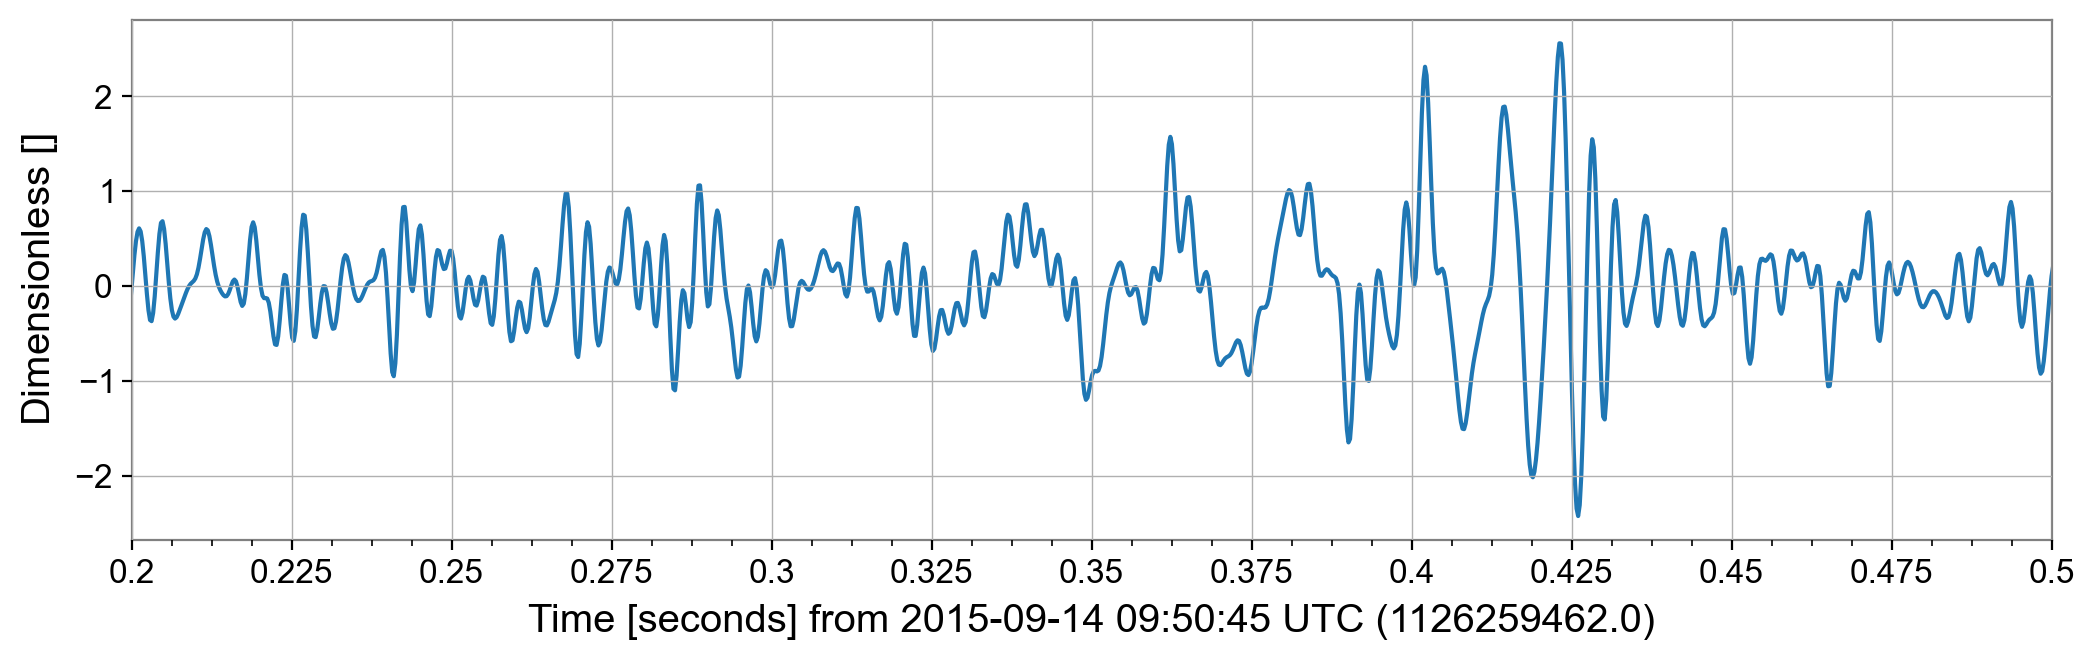

In [11]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

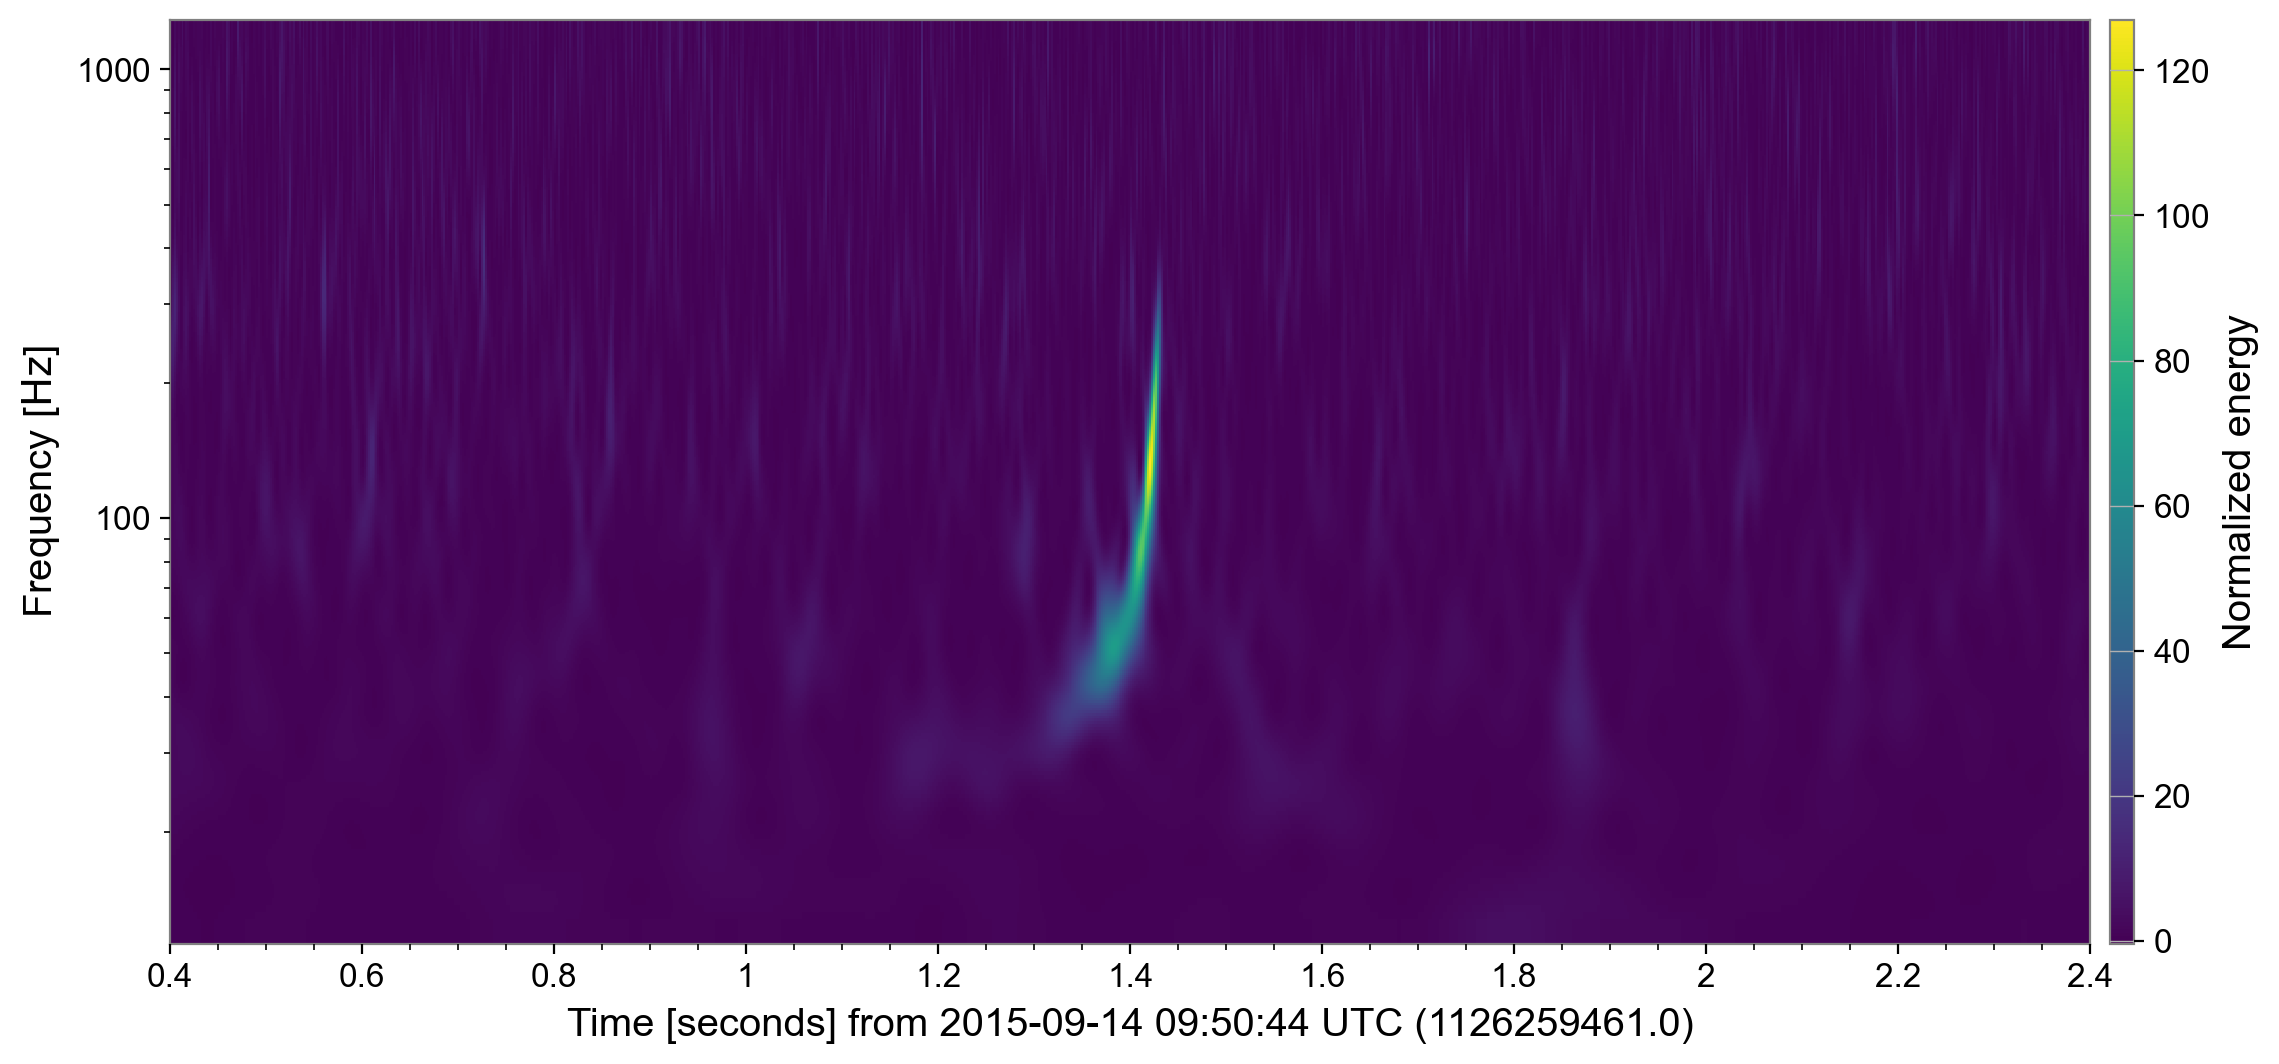

In [12]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')